In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [40]:
## Reading in datset.
df=pd.read_csv("train.csv")
df.head(10)

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35
5,F6,Airline B,Lake Steveville,East Patriciafurt,6254.0,2:08,10:33,8.43,NaN,0,Tuesday,December,NaN,Low,Snow,267,NaN,1.15,596.86
6,F7,Airline B,West Samanthaland,Port Brentport,3274.0,16:21,21:57,5.60,Boeing 787,0,Wednesday,January,Spring,Low,Clear,248,Special Offer,1.03,429.53
7,F8,Airline A,Port Eric,NaN,6460.0,12:46,22:44,9.98,Boeing 777,3,Thursday,May,Fall,Medium,Cloudy,226,NaN,1.14,835.36
8,F9,Airline C,Bryanland,Jessebury,1116.0,11:31,13:58,2.46,Airbus A320,0,Wednesday,June,Fall,Medium,Cloudy,56,NaN,0.85,385.73
9,F10,Airline B,Suechester,Clintonhaven,8677.0,5:32,17:01,11.49,Airbus A380,0,Friday,July,Summer,Low,Snow,236,Special Offer,0.80,652.88


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           45000 non-null  object 
 1   Airline             41427 non-null  object 
 2   Departure_City      44660 non-null  object 
 3   Arrival_City        44814 non-null  object 
 4   Distance            44909 non-null  float64
 5   Departure_Time      45000 non-null  object 
 6   Arrival_Time        45000 non-null  object 
 7   Duration            45000 non-null  float64
 8   Aircraft_Type       44957 non-null  object 
 9   Number_of_Stops     45000 non-null  int64  
 10  Day_of_Week         44775 non-null  object 
 11  Month_of_Travel     44733 non-null  object 
 12  Holiday_Season      35980 non-null  object 
 13  Demand              44683 non-null  object 
 14  Weather_Conditions  44698 non-null  object 
 15  Passenger_Count     45000 non-null  int64  
 16  Prom

In [42]:
df.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

In [43]:
## Checkinfg for percentage using isnull.
df.isnull().sum()/df.shape[0]*100

Flight_ID              0.000000
Airline                7.940000
Departure_City         0.755556
Arrival_City           0.413333
Distance               0.202222
Departure_Time         0.000000
Arrival_Time           0.000000
Duration               0.000000
Aircraft_Type          0.095556
Number_of_Stops        0.000000
Day_of_Week            0.500000
Month_of_Travel        0.593333
Holiday_Season        20.044444
Demand                 0.704444
Weather_Conditions     0.671111
Passenger_Count        0.000000
Promotion_Type        33.811111
Fuel_Price             0.200000
Flight_Price           0.000000
dtype: float64

In [44]:
# check for duplicates in the dataset
# df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [45]:
## Descriptive annalysis
df1=df.describe()
df1

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           45000 non-null  object 
 1   Airline             41427 non-null  object 
 2   Departure_City      44660 non-null  object 
 3   Arrival_City        44814 non-null  object 
 4   Distance            44909 non-null  float64
 5   Departure_Time      45000 non-null  object 
 6   Arrival_Time        45000 non-null  object 
 7   Duration            45000 non-null  float64
 8   Aircraft_Type       44957 non-null  object 
 9   Number_of_Stops     45000 non-null  int64  
 10  Day_of_Week         44775 non-null  object 
 11  Month_of_Travel     44733 non-null  object 
 12  Holiday_Season      35980 non-null  object 
 13  Demand              44683 non-null  object 
 14  Weather_Conditions  44698 non-null  object 
 15  Passenger_Count     45000 non-null  int64  
 16  Prom

In [47]:
df1.to_csv("Descriptive Analysis.csv")

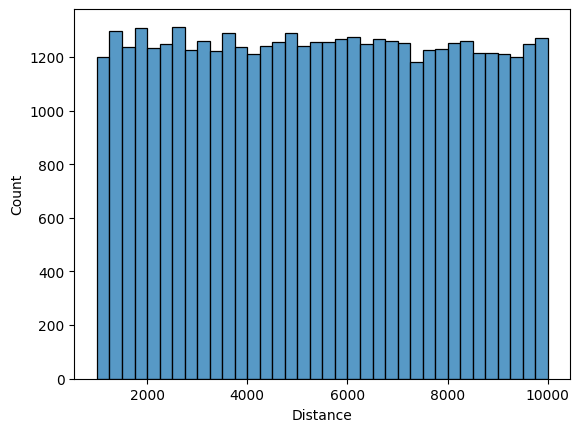

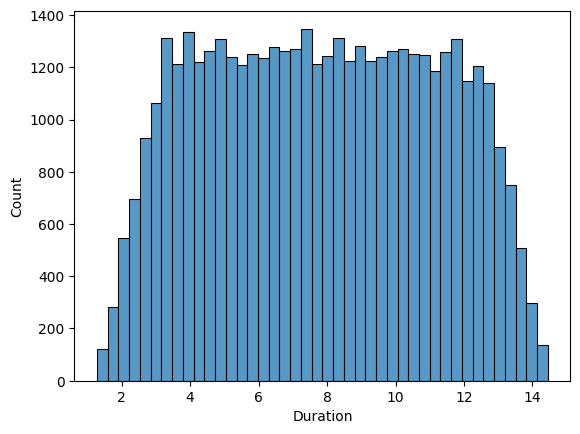

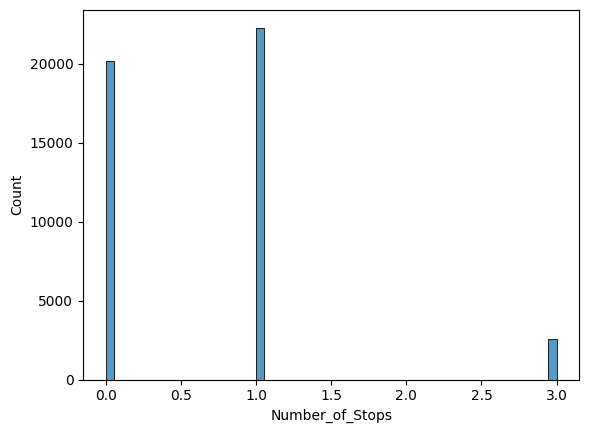

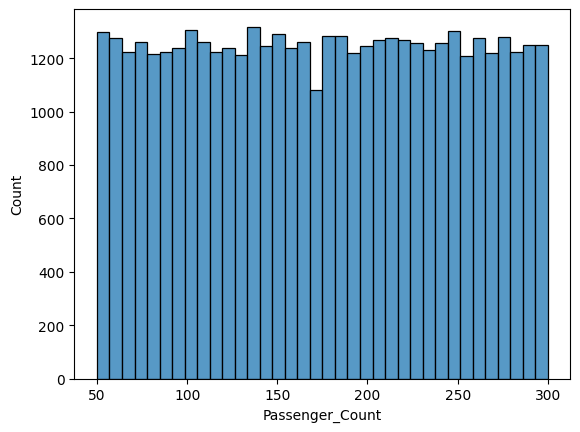

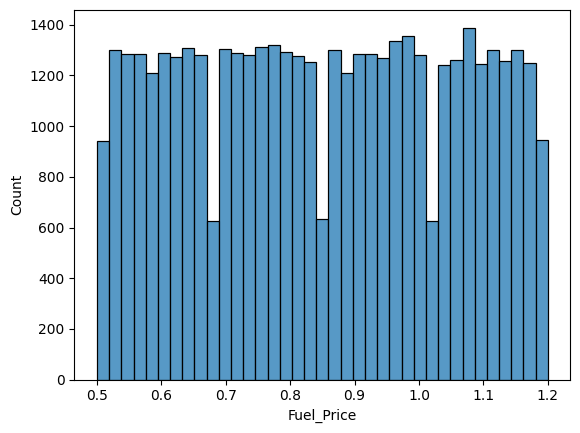

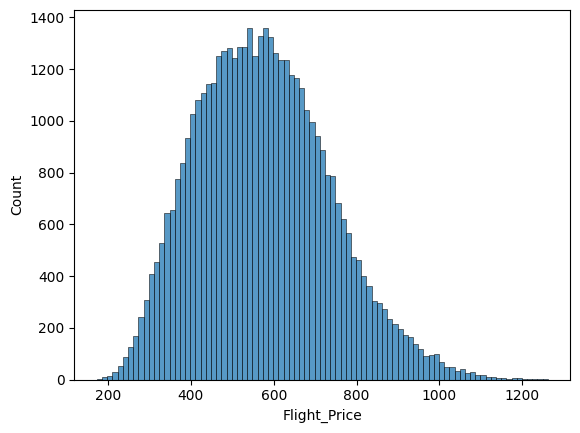

In [48]:
## distribution for numeric variable in the dataset.
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.histplot(data=df,x=i)
    plt.show()

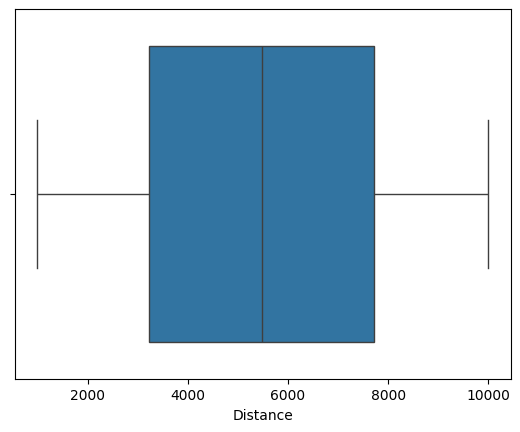

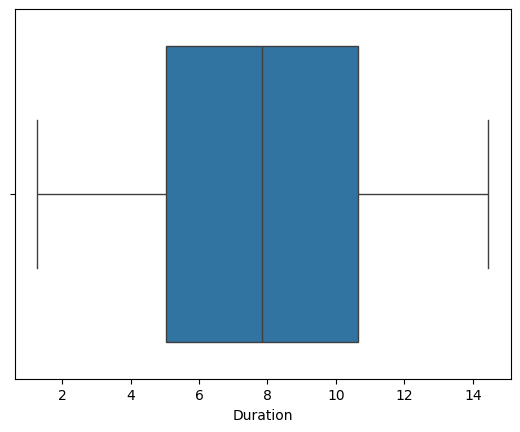

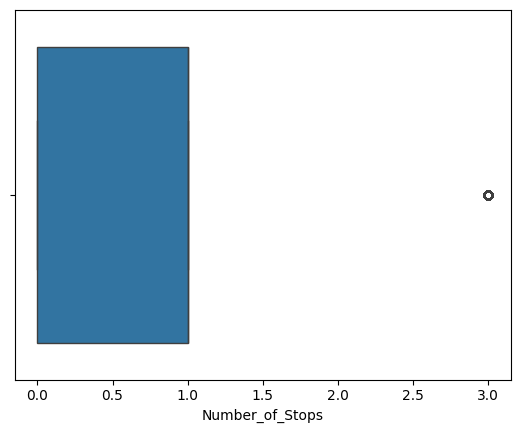

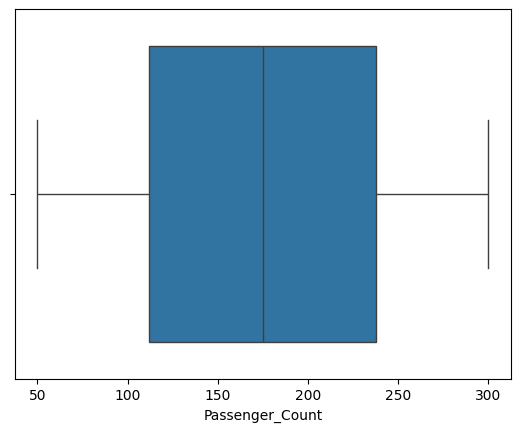

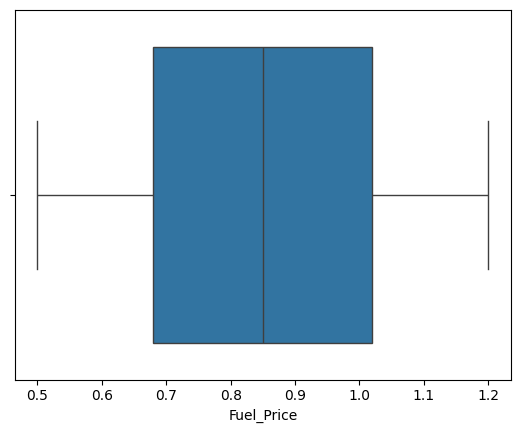

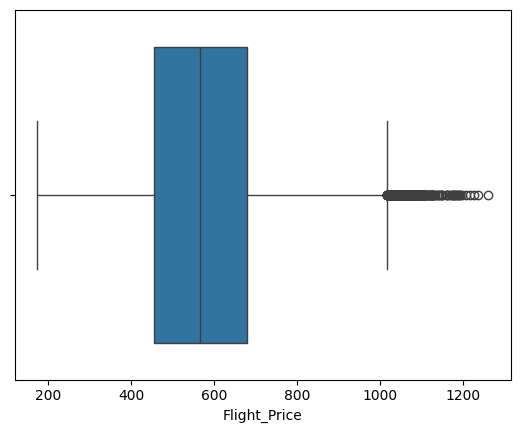

In [49]:
## Box-plot to identify outliers in the datset
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [50]:
## OUTLIER TREAtMENT
def wisker(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [51]:
## show the function of the wisker on a particular dataset
wisker(df["Flight_Price"])

(118.70499999999987, 1016.2850000000003)

In [52]:
for i in ['Flight_Price']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])
# We implement the wisker to the various columns.

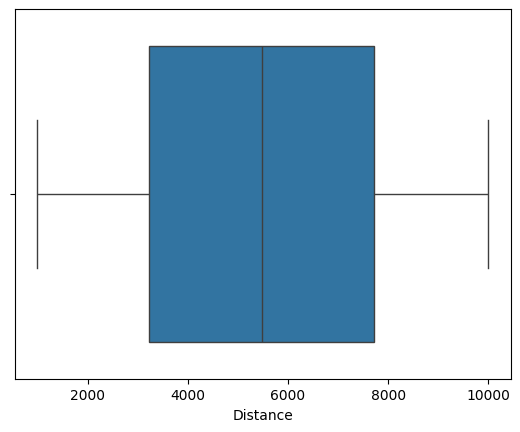

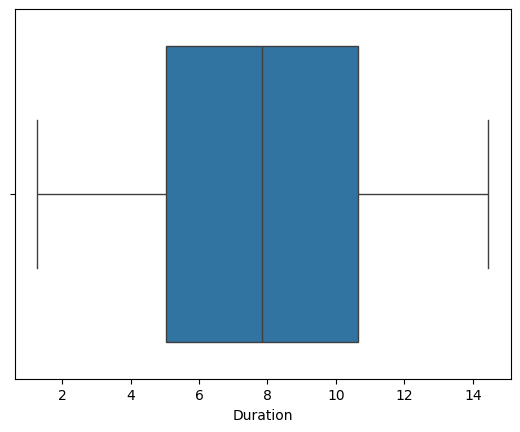

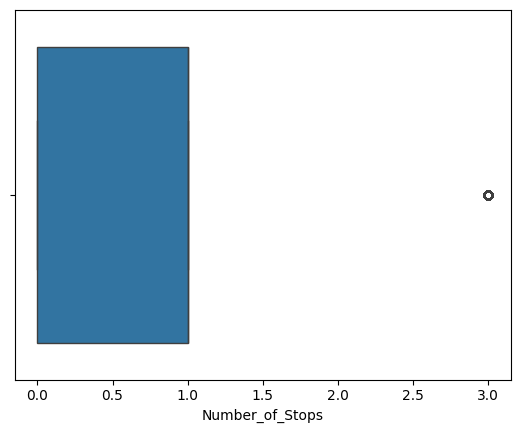

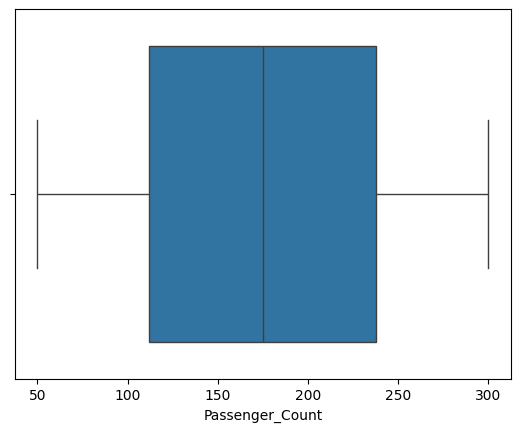

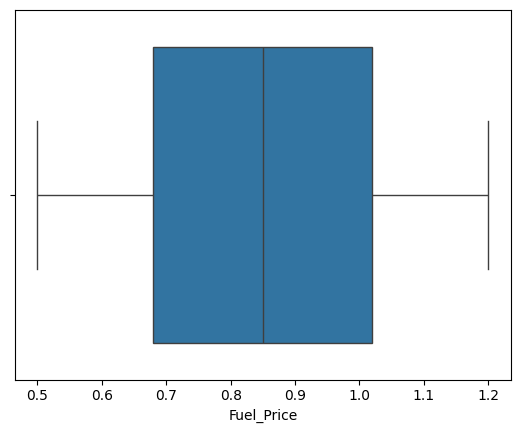

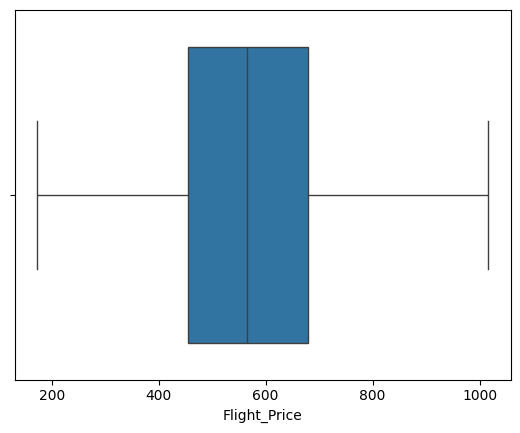

In [53]:
## Box-plot to identify outliers in the datset
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [54]:
## MISSING VALUE TREAMENT
import warnings
warnings.filterwarnings("ignore")
numerical_data=df.select_dtypes(include=["int64","float64"])
for x in numerical_data:
    df[x].fillna(df[x].mean(),inplace=True)
df.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                  0
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price                0
Flight_Price              0
dtype: int64

In [55]:
## MISSING VALUE TREAMENT
import warnings
warnings.filterwarnings("ignore")
category_data=df.select_dtypes(include=["object","category"])
for x in category_data:
    df[x].fillna(df[x].mode()[0],inplace=True)
df.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [56]:
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'],
      dtype='object')

In [57]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,0,1,16378,5763,8286.0,1343,739,11.94,4,0,6,2,2,1,2,240,1,0.91,643.93
1,11111,2,9554,12751,2942.0,748,705,5.29,0,0,6,7,1,1,2,107,1,1.08,423.13
2,22222,1,18756,15392,2468.0,150,414,4.41,4,1,3,11,2,0,1,131,1,0.52,442.17
3,33333,0,1000,2425,3145.0,744,681,4.96,4,0,3,3,0,1,1,170,0,0.71,394.42
4,39445,1,10526,14858,5558.0,839,1204,8.09,2,1,4,4,1,1,0,181,1,1.09,804.35


In [58]:
X=df.drop(["Flight_Price"],axis=1)
y=df["Flight_Price"]

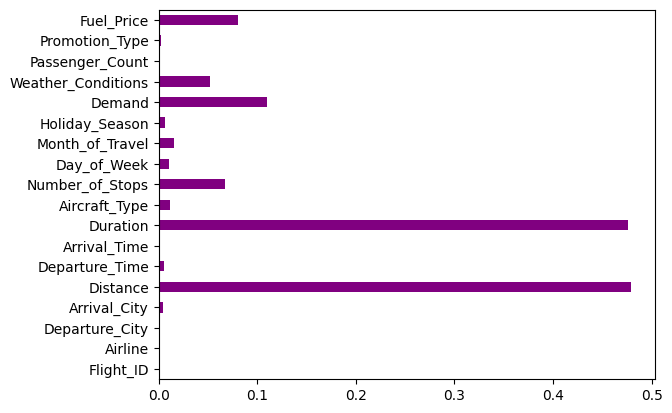

In [59]:
from sklearn.feature_selection import mutual_info_regression

# Perform feature selection using mutual information regression
importance = mutual_info_regression(X, y)
feature_impo = pd.Series(importance, index=X.columns)
feature_impo.plot(kind="barh", color="purple")
plt.show()


In [60]:
X.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,0,1,16378,5763,8286.0,1343,739,11.94,4,0,6,2,2,1,2,240,1,0.91
1,11111,2,9554,12751,2942.0,748,705,5.29,0,0,6,7,1,1,2,107,1,1.08
2,22222,1,18756,15392,2468.0,150,414,4.41,4,1,3,11,2,0,1,131,1,0.52
3,33333,0,1000,2425,3145.0,744,681,4.96,4,0,3,3,0,1,1,170,0,0.71
4,39445,1,10526,14858,5558.0,839,1204,8.09,2,1,4,4,1,1,0,181,1,1.09


In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.10,random_state=1)

In [62]:
from sklearn.pipeline import Pipeline
LinearModel=Pipeline([("scaler",StandardScaler()),("Regression",LinearRegression())])
Decision=Pipeline([("scaler",StandardScaler()),("Regression",DecisionTreeRegressor())])
print("LinearRegression in process....")
Decision.fit(xtrain,ytrain)
LinearModel.fit(xtrain,ytrain)
print("Done fitting Trainning set.")

LinearRegression in process....
Done fitting Trainning set.


In [63]:
pred2=Decision.predict(xtest)
pred2

array([581.46, 549.81, 902.59, ..., 503.25, 513.16, 595.89])

In [64]:
print("MAE",mean_absolute_error(ytest,pred2))
print("MAPE",mean_absolute_percentage_error(ytest,pred2))
print("MSE",mean_squared_error(ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 23.73053666666667
MAPE 0.04305925626937719
MSE 1098.5692885722224
R2 SCORE 0.9565234675131808


In [65]:
pred1=LinearModel.predict(xtest)
pred1

array([670.03316477, 664.56811963, 735.37702429, ..., 469.64330989,
       494.83604324, 700.47682166])

In [66]:
print("MAE",mean_absolute_error(ytest,pred1))
print("MAPE",mean_absolute_percentage_error(ytest,pred1))
print("MSE",mean_squared_error(ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 47.842564267339505
MAPE 0.08588455416338191
MSE 3622.0945130543923
R2 SCORE 0.8566534569960482


In [67]:
 import joblib

joblib.dump(LinearModel,"flight_predictor2.joblib")

['flight_predictor2.joblib']

In [68]:
x_test=pd.read_csv("test.csv")
x_test.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,NaN,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,NaN,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,NaN,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,NaN,Low,Rain,223,NaN,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [69]:
x_test.isnull().sum()

Flight_ID                0
Airline                427
Departure_City          39
Arrival_City            30
Distance                 9
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type            8
Number_of_Stops          0
Day_of_Week             25
Month_of_Travel         34
Holiday_Season         987
Demand                  34
Weather_Conditions      49
Passenger_Count          0
Promotion_Type        1689
Fuel_Price              10
dtype: int64

In [70]:
categorical_df=x_test.select_dtypes(include=["object","category"])
for x in categorical_df:
    x_test[x].fillna(x_test[x].mode()[0],inplace=True)
x_test.isnull().sum()

Flight_ID              0
Airline                0
Departure_City         0
Arrival_City           0
Distance               9
Departure_Time         0
Arrival_Time           0
Duration               0
Aircraft_Type          0
Number_of_Stops        0
Day_of_Week            0
Month_of_Travel        0
Holiday_Season         0
Demand                 0
Weather_Conditions     0
Passenger_Count        0
Promotion_Type         0
Fuel_Price            10
dtype: int64

In [71]:
x_test.shape

(5000, 18)

In [72]:
# Convert categorical values to numerical values
encoder=LabelEncoder()
category=x_test.select_dtypes(include=["object","category"])
for x in category:
    x_test[x]=encoder.fit_transform(x_test[x])
x_test.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,0,1,490,2072,3096.0,567,14,5.52,2,1,2,1,2,2,0,110,1,0.95
1,1,0,1795,302,8760.0,656,236,11.80,1,1,4,0,3,0,0,295,0,1.05
2,2,2,2180,4147,6365.0,192,812,9.59,3,1,3,4,3,1,2,223,0,0.63
3,3,0,3201,1364,7836.0,10,83,10.21,1,0,4,7,3,1,2,223,1,0.88
4,4,1,3791,2083,1129.0,1011,1118,1.86,0,1,2,1,2,0,1,145,1,1.11


In [73]:
x_test.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price'],
      dtype='object')

In [74]:
x_test.isnull().sum()

Flight_ID              0
Airline                0
Departure_City         0
Arrival_City           0
Distance               9
Departure_Time         0
Arrival_Time           0
Duration               0
Aircraft_Type          0
Number_of_Stops        0
Day_of_Week            0
Month_of_Travel        0
Holiday_Season         0
Demand                 0
Weather_Conditions     0
Passenger_Count        0
Promotion_Type         0
Fuel_Price            10
dtype: int64

In [75]:
x_test.dropna(inplace=True)

In [76]:
load=joblib.load("flight_predictor2.joblib")

In [77]:
predict=load.predict(x_test)

In [78]:
print(predict)

[563.9027945  898.9286471  562.24188148 ... 328.95379699 644.99254718
 650.3421234 ]


In [79]:
outcome={"predicted flight_price":predict}
df4=pd.DataFrame(outcome)
df4

,predicted flight_price
0,563.902794
1,898.928647
2,562.241881
3,617.620840
4,537.591587
...,...
4976,699.914773
4977,585.847187
4978,328.953797
4979,644.992547


In [84]:
new_data_frame=pd.concat([df4, x_test],axis=0)
new_data_frame

,predicted flight_price,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,563.902794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,898.928647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,562.241881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,617.620840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,537.591587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,4995.0,1.0,3018.0,1262.0,9389.0,857.0,121.0,12.35,3.0,1.0,5.0,7.0,3.0,0.0,1.0,143.0,1.0,0.51
4996,NaN,4996.0,0.0,1717.0,1565.0,7718.0,138.0,868.0,11.55,0.0,1.0,0.0,11.0,1.0,1.0,2.0,55.0,1.0,0.50
4997,NaN,4997.0,2.0,3083.0,300.0,2597.0,433.0,782.0,4.93,1.0,1.0,0.0,11.0,0.0,1.0,3.0,145.0,0.0,0.55
4998,NaN,4998.0,1.0,2831.0,3650.0,4659.0,1179.0,287.0,7.71,1.0,1.0,0.0,1.0,0.0,0.0,1.0,163.0,1.0,0.79
